In [172]:
from numpy import *
import operator
import matplotlib
import matplotlib.pyplot as plt

In [173]:
def createDataSet():
    group = array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])#数组，四维数组
    labels = ['A', 'A', 'B', 'B']#列表
    return group, labels

In [174]:
def kNNClassify(newInput, dataSet, labels, k):#数据分类 kNN算法分类
    numSamples = dataSet.shape[0] # shape[0] stands for the num of row  数据的维度 行
    ## step 1: calculate Euclidean distance  
    # tile(A, reps): Construct an array by repeating A reps times  
    # the following copy numSamples rows for dataSet  
    diff = tile(newInput, (numSamples, 1)) - dataSet # Subtract element-wise
    squaredDiff = diff ** 2 # squared for the subtract  
    squaredDist = sum(squaredDiff, axis = 1) # sum is performed by row  
    distance = squaredDist ** 0.5  
  
    ## step 2: sort the distance  
    # argsort() returns the indices that would sort an array in a ascending order  
    sortedDistIndices = argsort(distance)#升序排列
  
    classCount = {} # define a dictionary (can be append element)  字典
    for i in range(k):  
        ## step 3: choose the min k distance  
        voteLabel = labels[sortedDistIndices[i]]  
  
        ## step 4: count the times labels occur  
        # when the key voteLabel is not in dictionary classCount, get()  
        # will return 0  
        classCount[voteLabel] = classCount.get(voteLabel, 0) + 1  
  
    ## step 5: the max voted class will return  
    maxCount = 0  
    for key, value in classCount.items():  
        if value > maxCount:  
            maxCount = value  
            maxIndex = key  
  
    return maxIndex

In [175]:
group, labels = createDataSet()

In [176]:
kNNClassify([1, 1], group, labels, 3)

'A'

In [177]:
def file2matrix(filename):
    fr = open(filename) #open file
    arrayOLines = fr.readlines() #读取一行
    numberOfLines = len(arrayOLines)#获取文件的行数
    returnMat = zeros((numberOfLines, 3))#创建一个 行 X 3 的矩阵
    classLabelVector = []
    index = 0
    for line in arrayOLines: #开始解析文件中的数据
        line = line.strip() #当rm为空时，默认删除空白字符
        listFromLine = line.split('\t') #按指定分割符，切割字符串
        returnMat[index, :] = listFromLine[0 : 3]
        classLabelVector.append(int(listFromLine[-1]))#追加
        index += 1
    return returnMat, classLabelVector

In [178]:
datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')

In [179]:
datingDataMat

array([[  4.09200000e+04,   8.32697600e+00,   9.53952000e-01],
       [  1.44880000e+04,   7.15346900e+00,   1.67390400e+00],
       [  2.60520000e+04,   1.44187100e+00,   8.05124000e-01],
       ..., 
       [  2.65750000e+04,   1.06501020e+01,   8.66627000e-01],
       [  4.81110000e+04,   9.13452800e+00,   7.28045000e-01],
       [  4.37570000e+04,   7.88260100e+00,   1.33244600e+00]])

In [180]:
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.scatter(datingDataMat[:,1], datingDataMat[:,2])
#plt.show()

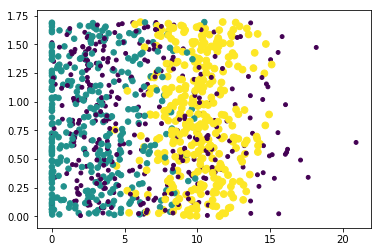

In [181]:
ax.scatter(datingDataMat[:,1], datingDataMat[:,2], 15.0*array(datingLabels), 15.0*array(datingLabels))
plt.show()

In [182]:
def autoNormal(dataSet):#归一化，newVale = (oldVale - min)/(max - min)（特征缩放）
    minVals = dataSet.min(0)#最小值
    maxVals = dataSet.max(0)#最大值
    ranges = maxVals - minVals#标准差
    normalDataSet = zeros(shape(dataSet))#dataSet那么多维的0矩阵
    m = dataSet.shape[0]#获取维度 行
    normalDataSet = dataSet - tile(minVals, (m, 1))#计算出 oldVale - main（归一化的值）
    normalDataSet = normalDataSet/tile(ranges, (m, 1))#计算出新的值
    return normalDataSet, ranges, minVals#返回 新值，标准差，最小值

In [183]:
normalDataSet, ranges, minVals = autoNormal(datingDataMat)
normalDataSet

array([[ 0.44832535,  0.39805139,  0.56233353],
       [ 0.15873259,  0.34195467,  0.98724416],
       [ 0.28542943,  0.06892523,  0.47449629],
       ..., 
       [ 0.29115949,  0.50910294,  0.51079493],
       [ 0.52711097,  0.43665451,  0.4290048 ],
       [ 0.47940793,  0.3768091 ,  0.78571804]])

In [184]:
ranges

array([  9.12730000e+04,   2.09193490e+01,   1.69436100e+00])

In [185]:
minVals

array([ 0.      ,  0.      ,  0.001156])

In [186]:
def datingClassTest():
    hoRatio = 0.10
    datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')
    normMat, ranges, minVals = autoNormal(datingDataMat)#归一化数据（特征缩放）
    m = normMat.shape[0]#新值的维度 行
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = kNNClassify(normMat[i,:], normMat[numTestVecs,:], datingLabels[numTestVecs:m], 3) # kNNE算法分类
        print("the classifier came back with: %d, the real answer is : %d" % (classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]): #如果分类结果 与标签不符合，就修改误差
            errorCount += 1.0
    print("the total error rate is : %f" % (errorCount/float(numTestVecs)))

In [187]:
datingClassTest()

the classifier came back with: 3, the real answer is : 3
the classifier came back with: 3, the real answer is : 2
the classifier came back with: 3, the real answer is : 1
the classifier came back with: 3, the real answer is : 1
the classifier came back with: 3, the real answer is : 1
the classifier came back with: 3, the real answer is : 1
the classifier came back with: 3, the real answer is : 3
the classifier came back with: 3, the real answer is : 3
the classifier came back with: 3, the real answer is : 1
the classifier came back with: 3, the real answer is : 3
the classifier came back with: 3, the real answer is : 1
the classifier came back with: 3, the real answer is : 1
the classifier came back with: 3, the real answer is : 2
the classifier came back with: 3, the real answer is : 1
the classifier came back with: 3, the real answer is : 1
the classifier came back with: 3, the real answer is : 1
the classifier came back with: 3, the real answer is : 1
the classifier came back with: 